# Written_P1_Maximum_Margin_Classifiers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

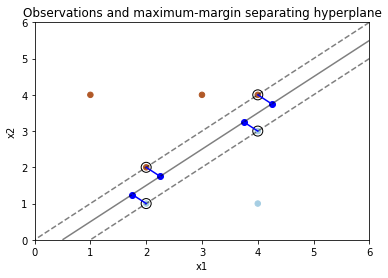

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# input the observations and their labels
X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,3],[4,1]], dtype=np.int32)
y= np.array([1,1,1,1,0,0,0])

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
plt.xlim([0, 6])
plt.ylim([0, 6])
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

# plot margin vectors
theta = clf.coef_[0]
theta0 = clf.intercept_
for idx in clf.support_[:4]:
    x0 = X[idx]
    y0 = y[idx]
    margin_x0 = (theta.dot(x0) + theta0)[0] / np.linalg.norm(theta)
    w = theta / np.linalg.norm(theta)
    plt.plot([x0[0], x0[0]-w[0]*margin_x0], [x0[1], x0[1]-w[1]*margin_x0], color='blue')
    plt.scatter([x0[0]-w[0]*margin_x0], [x0[1]-w[1]*margin_x0], color='blue')

# save the plot
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Observations and maximum-margin separating hyperplane")
plt.savefig("Observations and maximum-margin separating hyperplane")
plt.show()

In [3]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

In [4]:
# get the support vectors
clf.support_vectors_

array([[2., 1.],
       [4., 3.],
       [2., 2.],
       [4., 4.]])

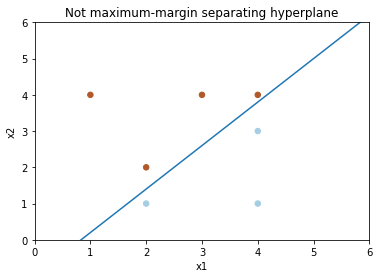

In [5]:
# input the observations and their labels
X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,3],[4,1]], dtype=np.int32)
y= np.array([1,1,1,1,0,0,0])
# plot the points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the hyperplane that separates the data
plt.xlim([0, 6])
plt.ylim([0, 6])
x = np.linspace(0, 10, 1000)
plt.plot(x, 1.2*x - 1, linestyle='-')  # solid

# save the plot
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Not maximum-margin separating hyperplane")
plt.savefig("Not maximum-margin separating hyperplane")
plt.show()

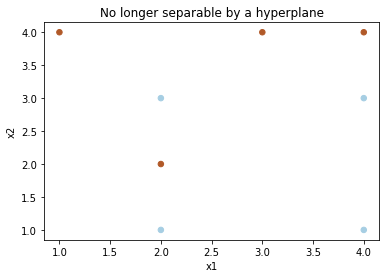

In [6]:
# input the observations and their labels
X = np.array([[3,4],[2,2],[4,4],[1,4],[2,1],[4,3],[4,1],[2, 3]], dtype=np.int32)
y= np.array([1,1,1,1,0,0,0,0])
# plot the points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# save the plot
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("No longer separable by a hyperplane")
plt.savefig("No longer separable by a hyperplane")
plt.show()